# 2D Probability Distribution

In [ ]:
import scipy.stats as stats
import numpy as np
from my_stats.probability_distribution.two_dim_prob_dist import (
    TwoDimensionalDistributionData,
    render_plot_2d,
)

## Normal Distribution

In [3]:
def prepare_normal_data(mean: np.ndarray, cov: np.ndarray, num_points: int = 1000):
    """
    Prepare data for a 2D normal distribution.

    Args:
        mean (np.ndarray): Mean vector of the distribution.
        cov (np.ndarray): Covariance matrix of the distribution.
        num_points (int): Number of points to generate.
    Returns:
        TwoDimensionalDistributionData: Prepared data for plotting.
    """
    x = np.linspace(
        mean[0] - 4 * np.sqrt(cov[0, 0]),
        mean[0] + 4 * np.sqrt(cov[0, 0]),
        int(np.sqrt(num_points)),
    )
    y = np.linspace(
        mean[1] - 4 * np.sqrt(cov[1, 1]),
        mean[1] + 4 * np.sqrt(cov[1, 1]),
        int(np.sqrt(num_points)),
    )
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = stats.multivariate_normal(mean, cov)
    Z = rv.pdf(pos)

    data = TwoDimensionalDistributionData(X=X, Y=Y, Z=np.array(Z))
    return data

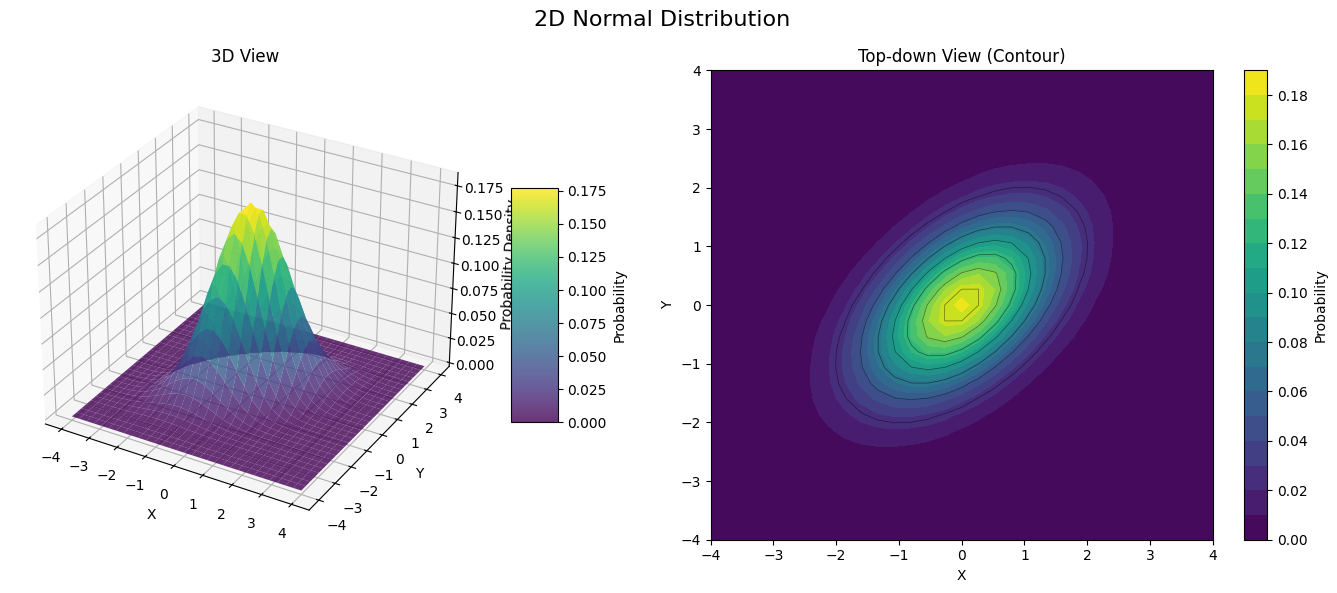

In [4]:
mu = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.5], [0.5, 1.0]])
data = prepare_normal_data(mean=mu, cov=cov)
render_plot_2d(data, title="2D Normal Distribution")

## Dirichlet distribution

In [6]:
def prepare_dirichlet_data(
    alpha: np.ndarray, num_points: int = 10000
) -> TwoDimensionalDistributionData:
    # 1. データ取得
    # X + Y + Z = 1 かつ X,Y,Z >= 0 の条件を満たす点を生成
    x = np.linspace(0, 1, int(np.sqrt(num_points)))
    y = np.linspace(0, 1, int(np.sqrt(num_points)))
    X, Y = np.meshgrid(x, y)
    Z = 1.0 - X - Y

    mask = Z >= 0

    valid_X = X[mask]
    valid_Y = Y[mask]
    valid_Z = Z[mask]

    points = np.vstack([valid_X, valid_Y, valid_Z])

    # 2. PDF計算 (有効な点だけ計算されるので高速)
    # points は (3, N) なのでそのまま渡せばOK
    pdf_values = stats.dirichlet.pdf(points, alpha)

    # 3. 2次元グリッドへの復元 (ここが重要！)
    # 元の形状 (100, 100) のゼロ配列を作る
    Z_grid = np.zeros(mask.shape)

    # マスクの位置に計算結果を代入する
    # これで、定義域外は 0、定義域内は計算値が入った (100, 100) の配列になる
    Z_grid[mask] = pdf_values

    # 4. データクラスへの格納
    # X, Y, Z すべて (100, 100) の2次元配列として渡す
    return TwoDimensionalDistributionData(
        X=X,  # points[0,:] ではなくグリッドを渡す
        Y=Y,  # points[1,:] ではなくグリッドを渡す
        Z=Z_grid,  # 復元したZを渡す
    )

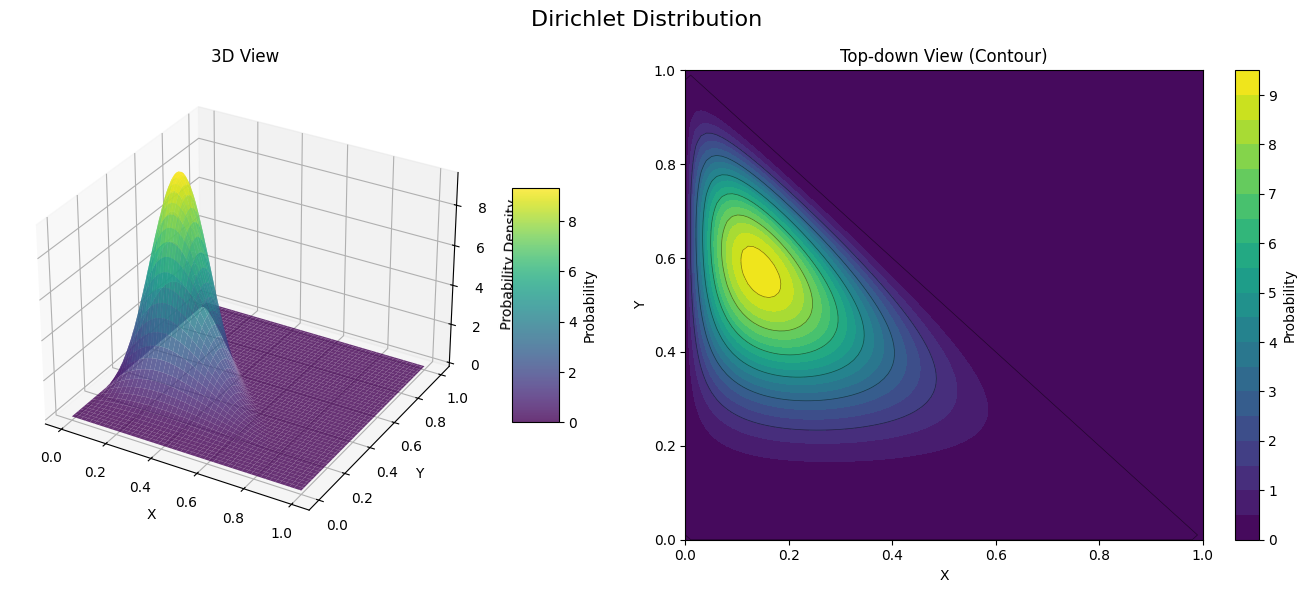

In [7]:
data = prepare_dirichlet_data(alpha=np.array([2.0, 5.0, 3.0]))
render_plot_2d(data, title="Dirichlet Distribution")

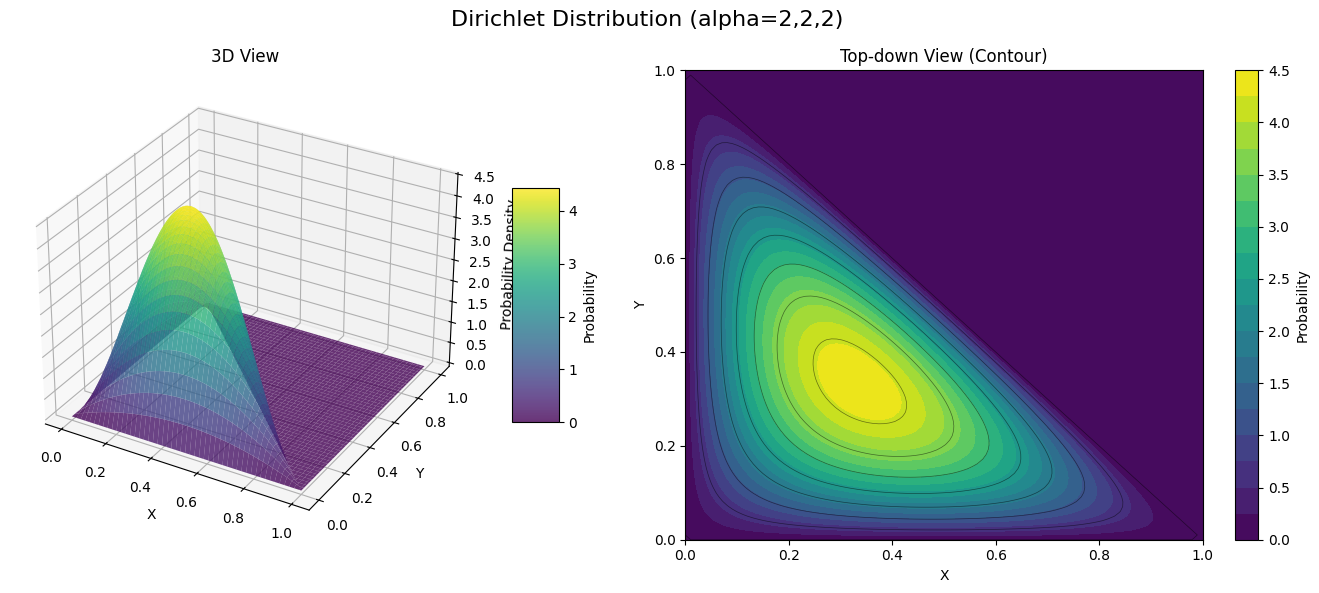

In [8]:
data = prepare_dirichlet_data(alpha=np.array([2.0, 2.0, 2.0]))
render_plot_2d(data, title="Dirichlet Distribution (alpha=2,2,2)")